In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
from scipy.interpolate import make_interp_spline

In [40]:
without_outlier = pd.read_pickle('merged_data_outlier.pkl')
without_outlier = without_outlier.loc[without_outlier['anomaly']!=-1].copy()
without_outlier = without_outlier.sort_index(axis=0)
without_outlier.index = np.arange(1, len(without_outlier) + 1)
without_outlier

,post_month,source_id,account_id,icms_rep_brand,icms_form,icms_rep_mfg,patient_age_type,rep_category_ids,units,revenue,unit_price,scores,anomaly
1,2017-01-01,0,1003,Acepromazine,Pill,Multiple,Adult,[250],33.0,74.85,2.268182,0.092650,1
2,2017-01-01,0,1003,A/D,Wet,Hill's,Adult,[210],12.0,41.76,3.480000,0.111914,1
3,2017-01-01,0,1003,Amitriptyline,Pill,Multiple,Adult,[260],60.0,34.50,0.575000,0.160651,1
4,2017-01-01,0,1003,Amoxicillin Clavulanate,Pill,Multiple,Adult,[230],134.0,274.80,2.050746,0.144380,1
5,2017-01-01,0,1003,Apoquel,Pill,Zoetis,Adult,[220],1822.0,4371.95,2.399533,0.078834,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503561,2022-07-01,2,9999,Urinary SO MC,Dry,Royal Canin,Adult,[210],1.0,46.44,46.440000,0.087900,1
39503562,2022-07-01,2,9999,Vectra 3D,Topical,Ceva,Adult,[1],21.0,473.37,22.541429,0.147241,1
39503563,2022-07-01,2,9999,Vectra 3D,Topical,Ceva,Non-adult,[1],2.0,40.06,20.030000,0.166939,1
39503564,2022-07-01,2,9999,W/D,Wet,Hill's,Adult,[210],10.0,38.90,3.890000,0.119634,1


In [41]:
mfg_Monthly_Sales = without_outlier.groupby(['icms_rep_mfg', 'post_month'], as_index=False)[['units', 'revenue']].sum()
mfg_Monthly_Sales

,icms_rep_mfg,post_month,units,revenue
0,American Regent,2017-01-01,1.203965e+04,4.829852e+05
1,American Regent,2017-02-01,1.195005e+04,4.812508e+05
2,American Regent,2017-03-01,1.365226e+04,5.532645e+05
3,American Regent,2017-04-01,1.351945e+04,5.524538e+05
4,American Regent,2017-05-01,1.395422e+04,5.640385e+05
...,...,...,...,...
1761,Zoetis,2022-03-01,1.036996e+07,7.842070e+07
1762,Zoetis,2022-04-01,1.036854e+07,7.860488e+07
1763,Zoetis,2022-05-01,1.050092e+07,7.910210e+07
1764,Zoetis,2022-06-01,1.068286e+07,8.051396e+07


In [42]:
# get mfg list
mfgs = without_outlier.groupby(['icms_rep_mfg'], as_index=False)['revenue'].sum()
mfgs = mfgs['icms_rep_mfg'].tolist()
mfgs

['American Regent',
 'BI',
 'Blue Buffalo',
 'CAP IM',
 'Ceva',
 'Covetrus',
 'Dechra',
 'Elanco',
 "Hill's",
 'IVet',
 'Merck',
 'Multiple',
 'Norbrook',
 'Nutramax',
 'PRN Pharmacal',
 'Parnell',
 'Pet Health Solutions',
 'PetIQ',
 'Purina',
 'Royal Canin',
 'Unspecified',
 'Vedco',
 'VetOne',
 'Vetoquinol',
 'VetriScience',
 'Vetz Petz',
 'Virbac',
 'Zoetis']

In [43]:
font1 = {'family' : 'Times New Roman',
         'weight' : 'normal',
         'size' : 20,
         }
font2 = {'family' : 'Times New Roman',
         'weight' : 'normal',
         'size' : 17,
         }

def getMfgSalesTrend(mfg):
    title = mfg
    mfg = mfg_Monthly_Sales.loc[mfg_Monthly_Sales['icms_rep_mfg'] == mfg]
    x = mfg['post_month'].tolist()
    y = mfg['revenue']

    fig = plt.figure(figsize=(12, 8), dpi=100)
    ax = fig.add_subplot(111)
    ax.scatter(x, y, color='steelblue')
    # ax.plot(x, y, 'b:o', label='Revenue', linewidth=0, color='deepskyblue')
    ax.plot(x, y, linestyle='solid', label='Revenue', color='deepskyblue')
    plt.grid(True,color="black",axis="both",ls="--",lw=0.5)
    c = np.mean(mfg['revenue'])
    ax.axhline(y=c, color="darkseagreen", label='Mean', linestyle='--')

    ax.legend(prop={'family': 'Times New Roman', 'size': 16})
    plt.yticks(fontproperties = 'Times New Roman', size = 14, color='gray')
    plt.xticks(fontproperties = 'Times New Roman', size = 14, color='gray')
    ax.set_ylabel('Revenue', font2, color='gray')
    ax.set_xlabel('Year', font2, color='gray')
    ax.set_title(title, font1, color='gray')

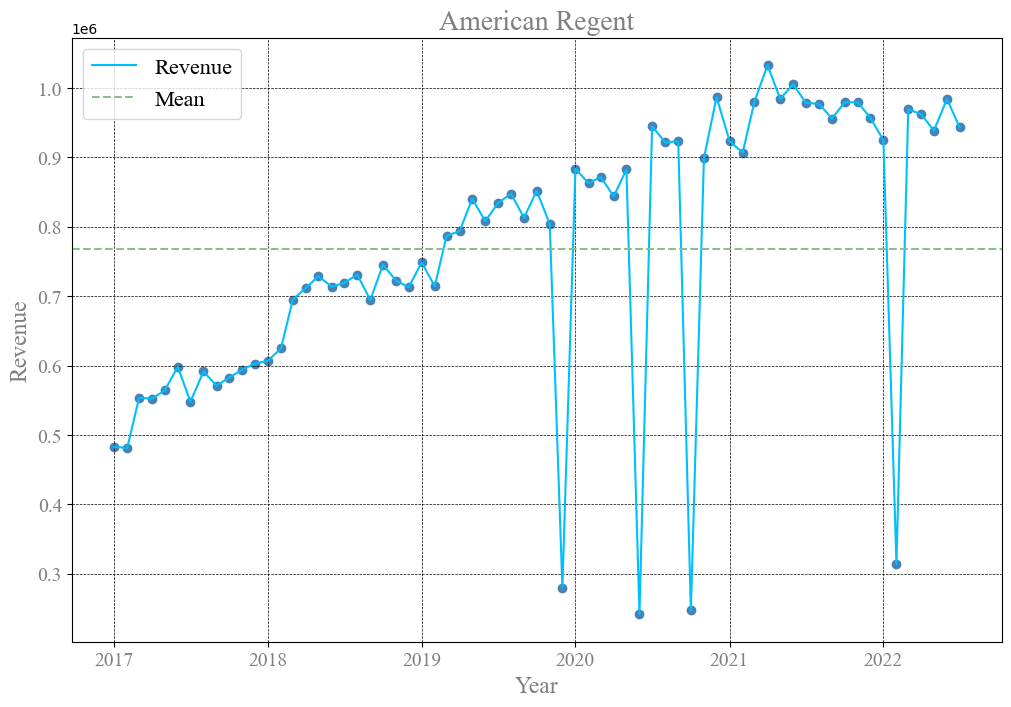

In [44]:
getMfgSalesTrend(mfgs[0])

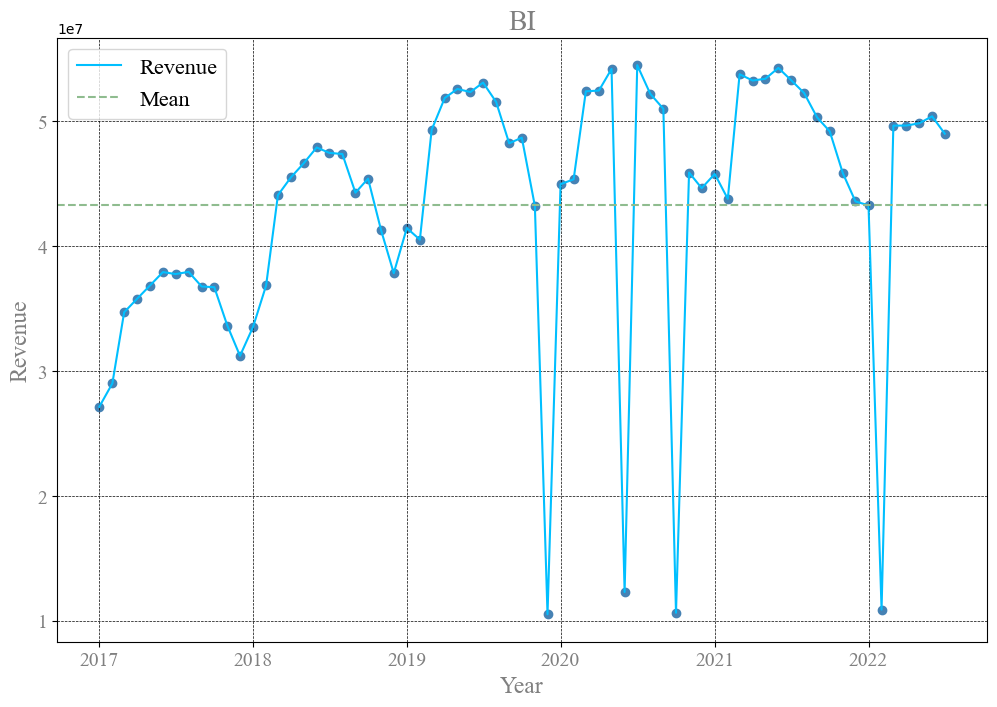

In [45]:
getMfgSalesTrend(mfgs[1])
plt.savefig('BI.png')

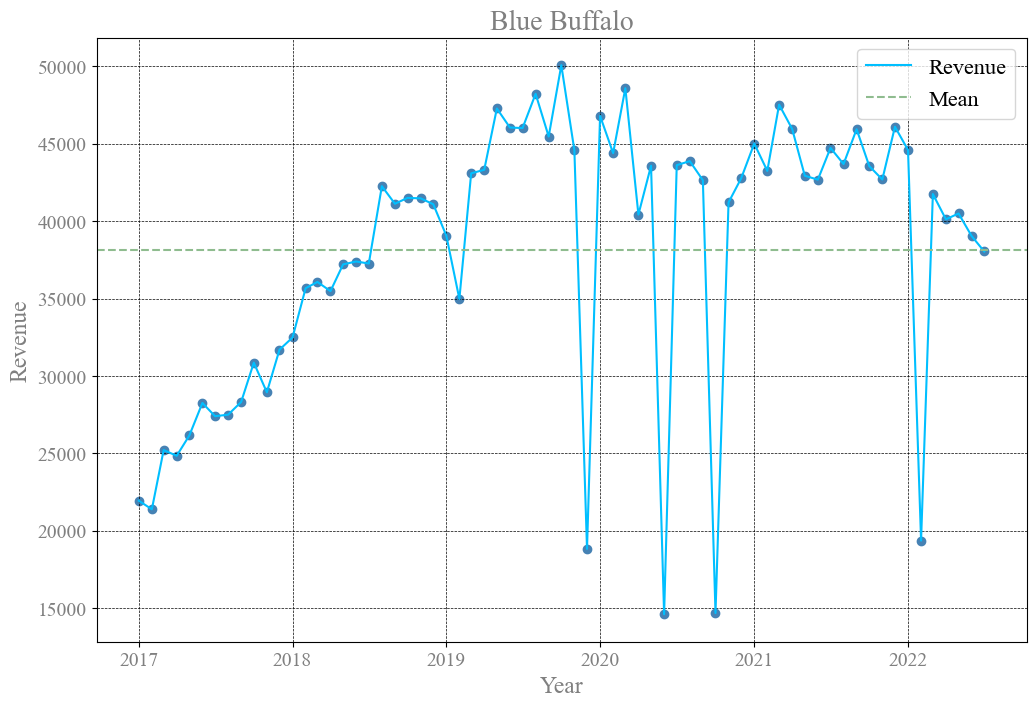

In [46]:
getMfgSalesTrend(mfgs[2])

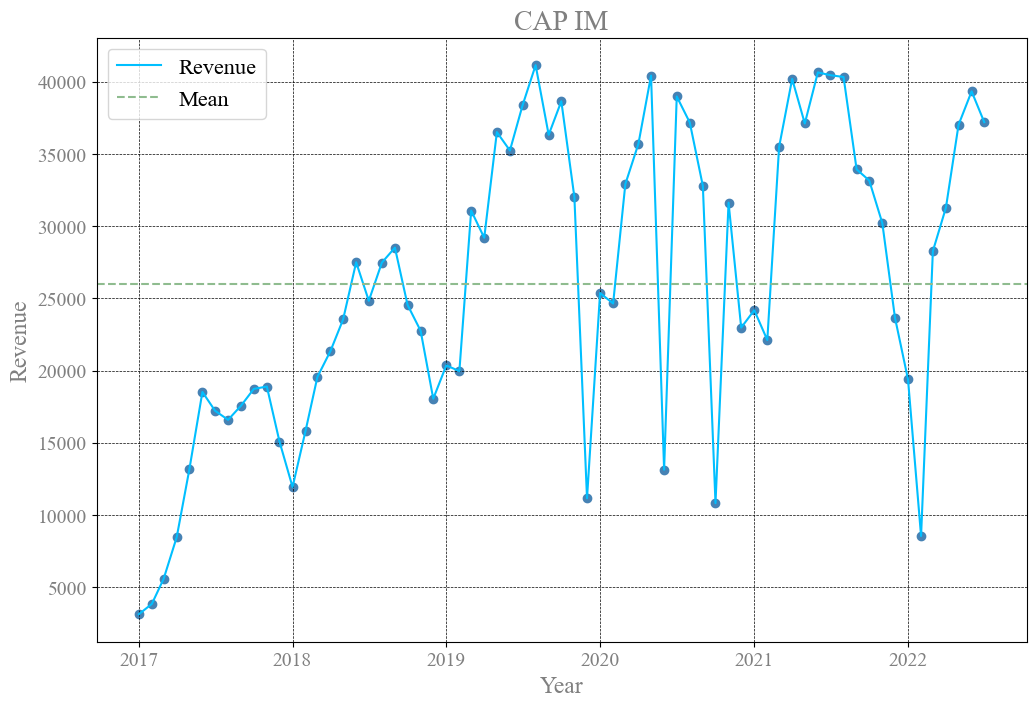

In [47]:
getMfgSalesTrend(mfgs[3])
plt.savefig('CAP.png')

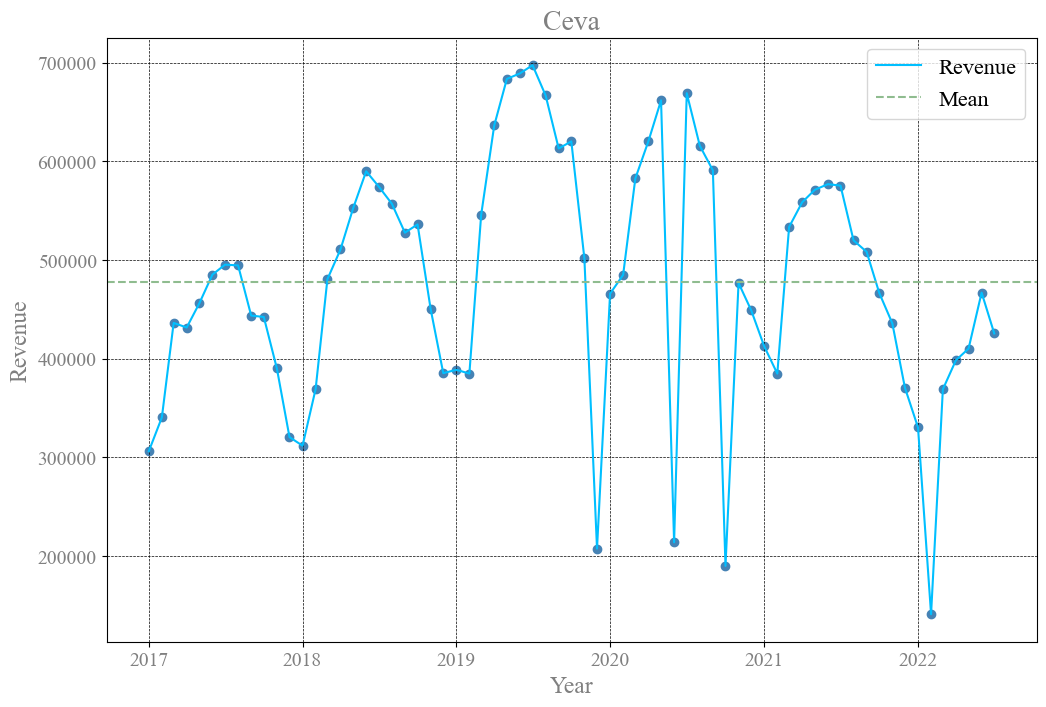

In [48]:
getMfgSalesTrend(mfgs[4])
plt.savefig('Ceva.png')

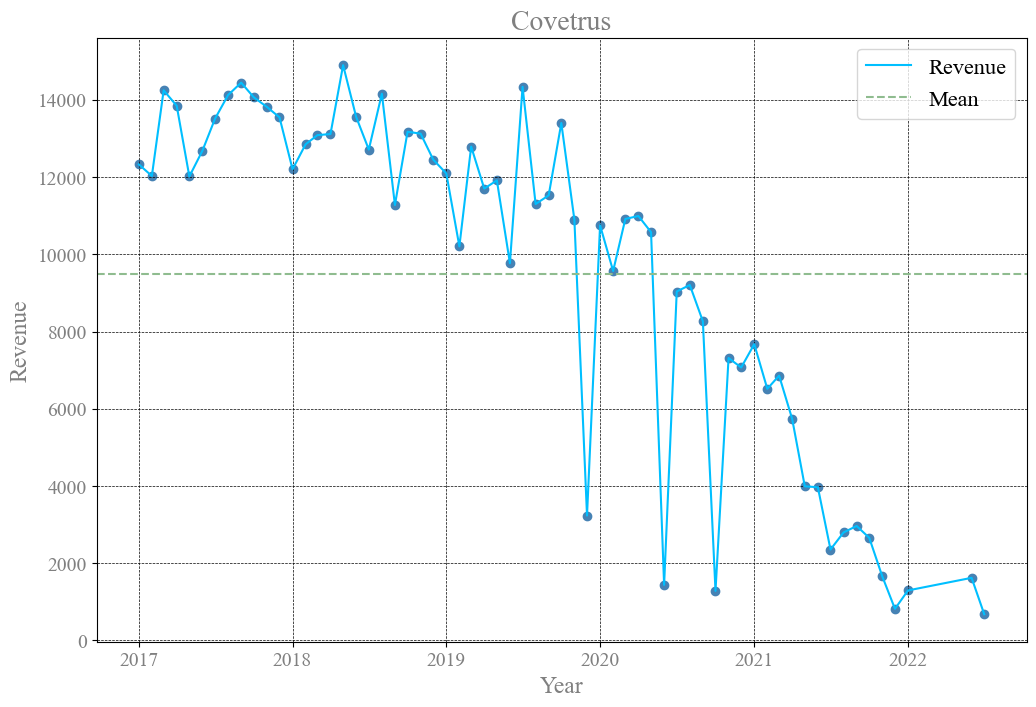

In [49]:
getMfgSalesTrend(mfgs[5])

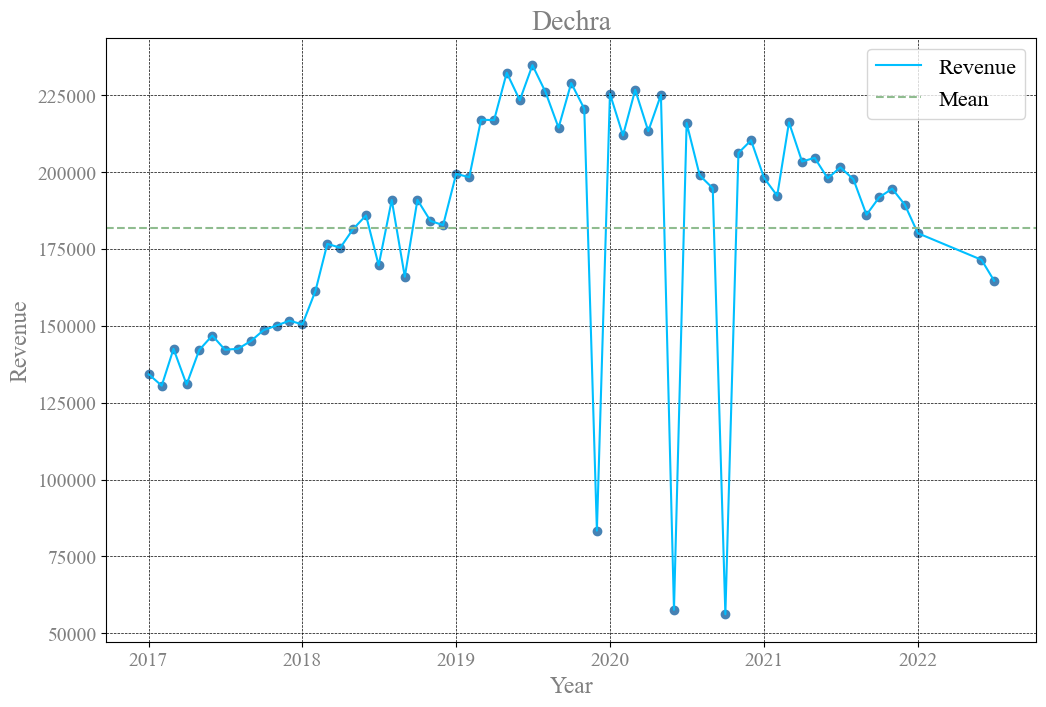

In [50]:
getMfgSalesTrend(mfgs[6])

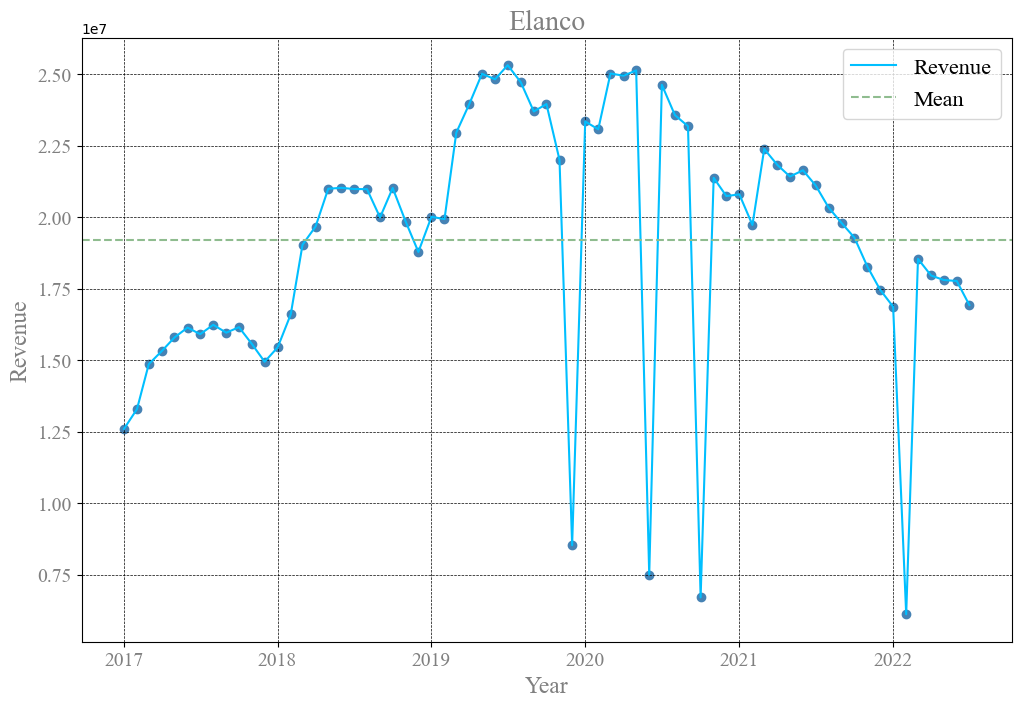

In [51]:
getMfgSalesTrend(mfgs[7])
plt.savefig('Elanco.png')

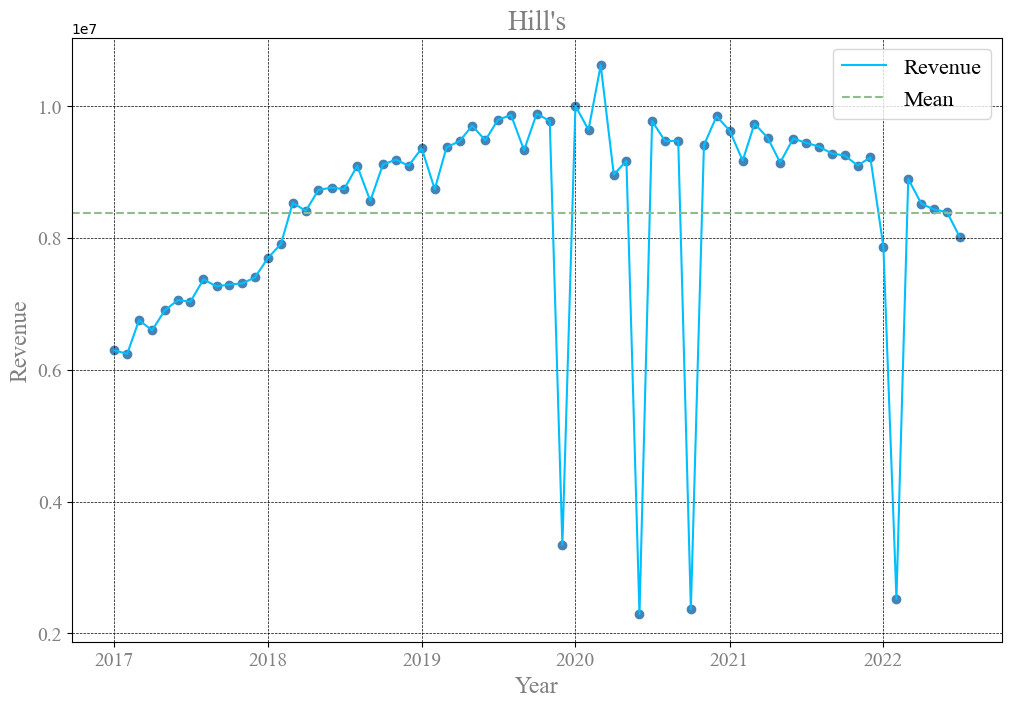

In [52]:
getMfgSalesTrend(mfgs[8])

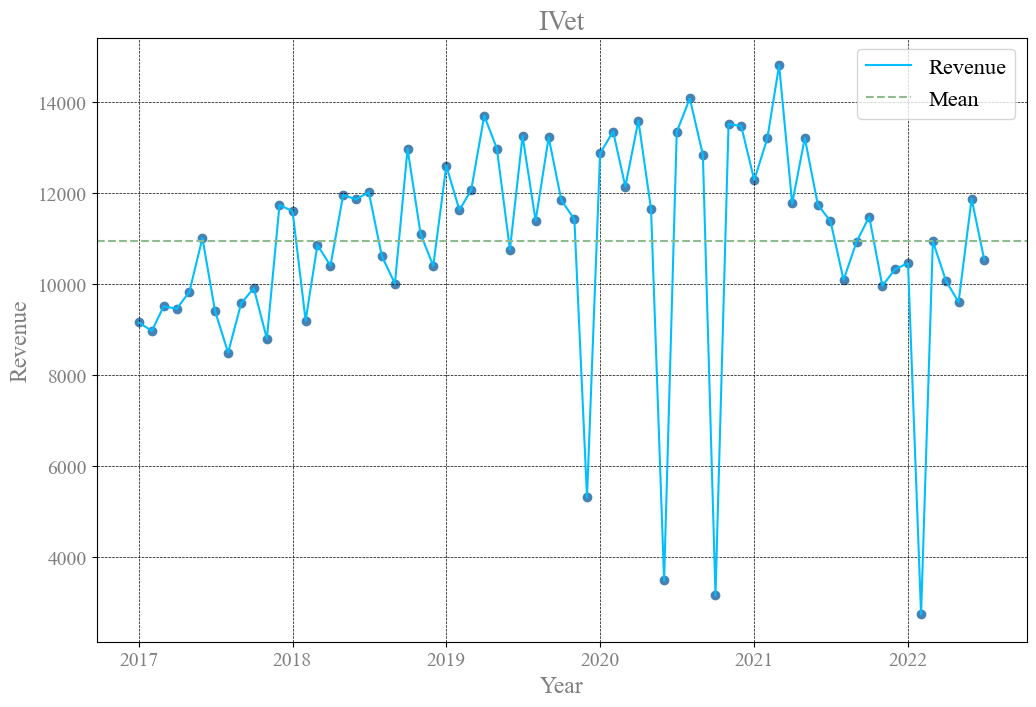

In [53]:
getMfgSalesTrend(mfgs[9])

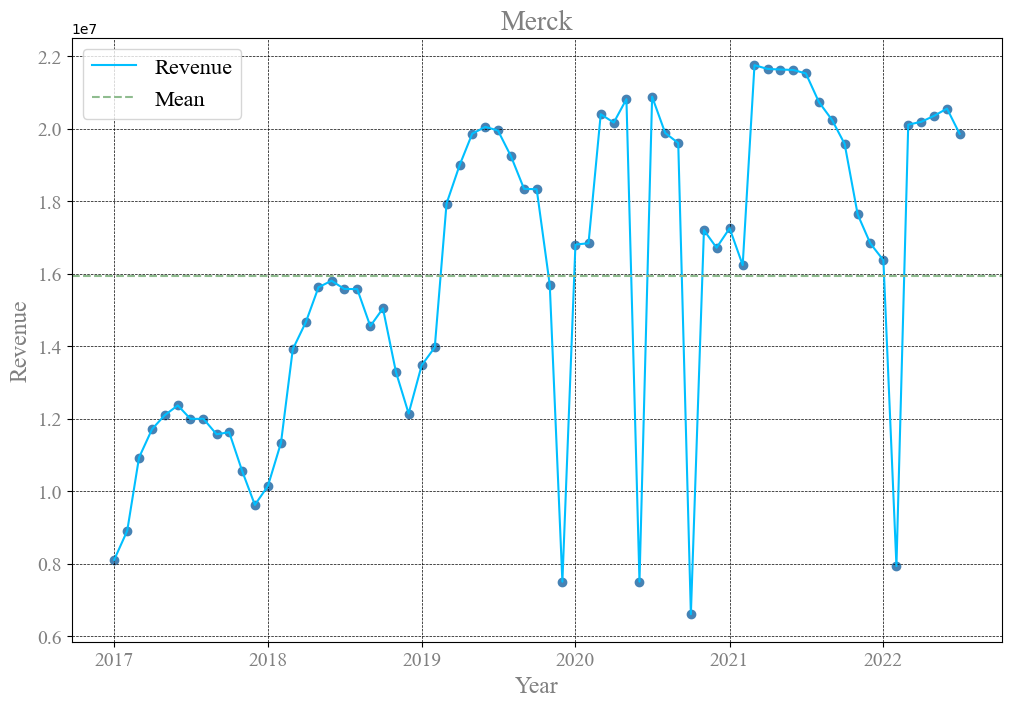

In [54]:
getMfgSalesTrend(mfgs[10])
plt.savefig('Merck.png')

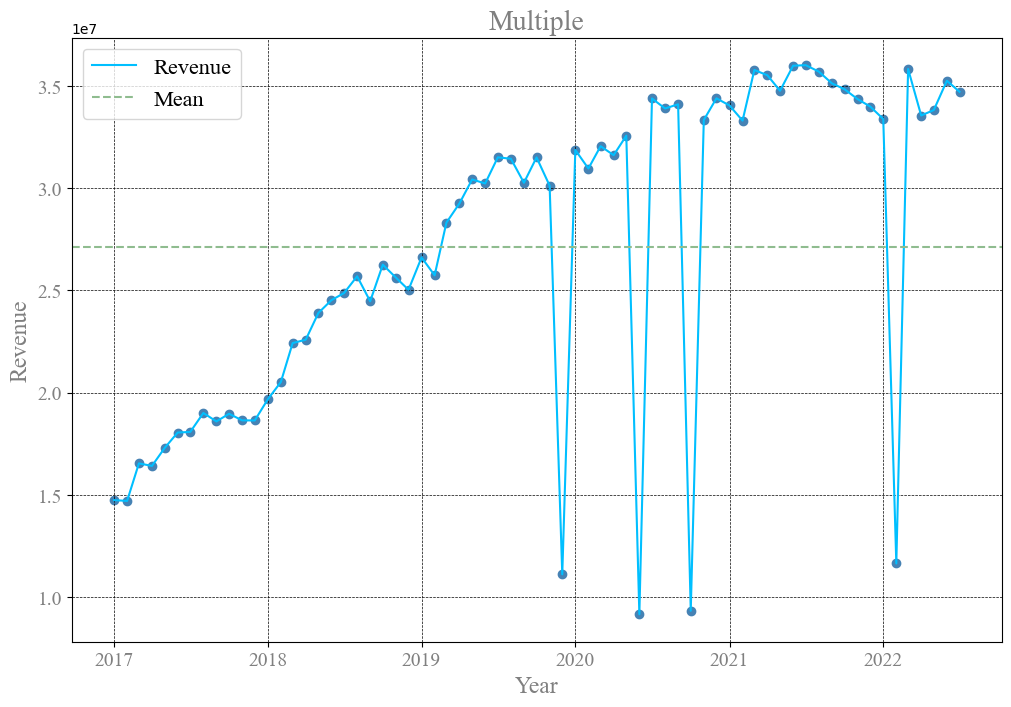

In [55]:
getMfgSalesTrend(mfgs[11])

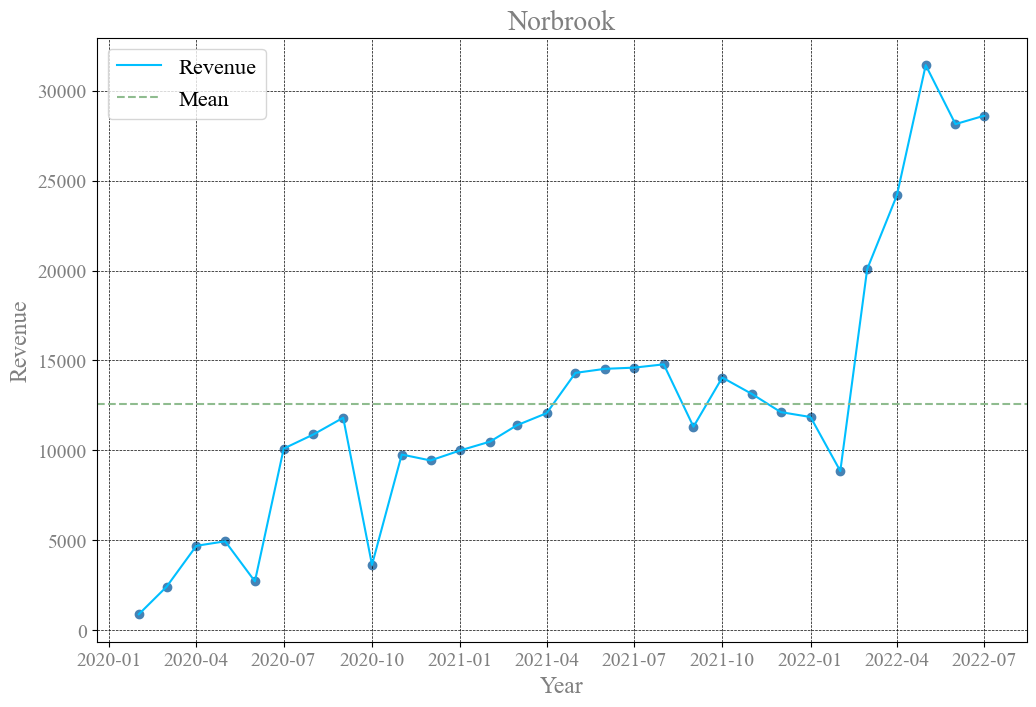

In [56]:
getMfgSalesTrend(mfgs[12])

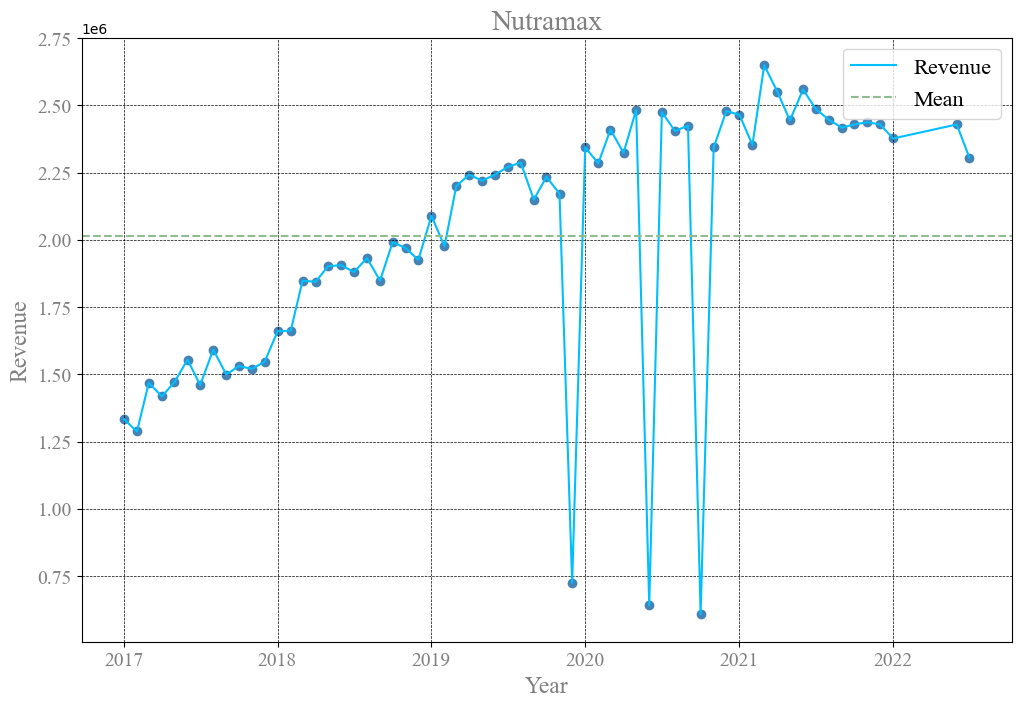

In [57]:
getMfgSalesTrend(mfgs[13])

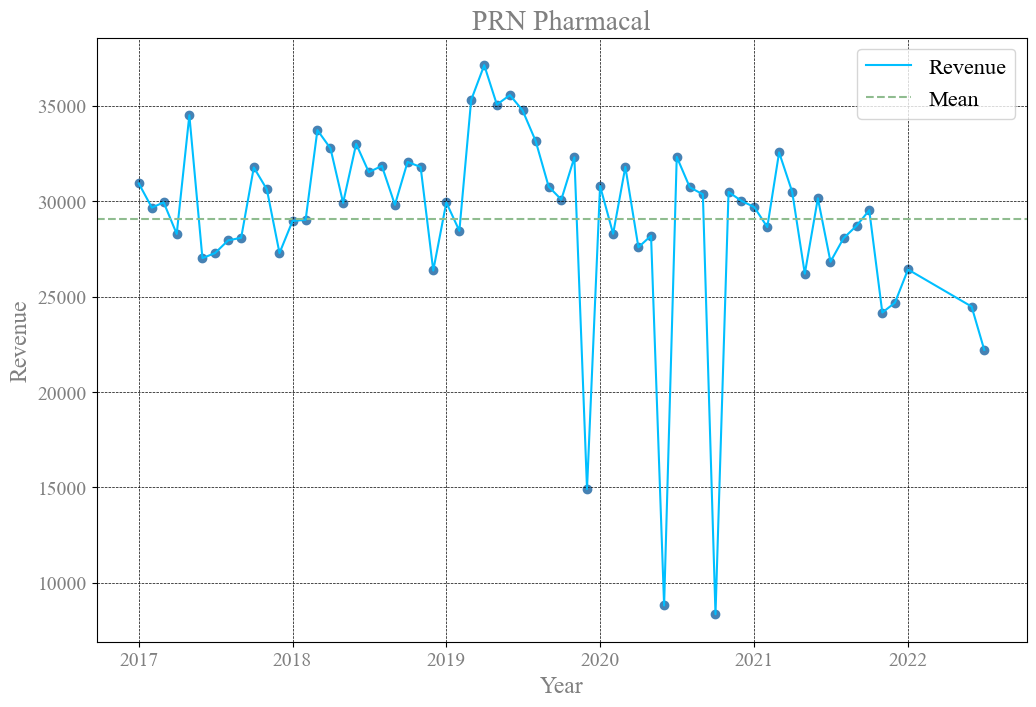

In [58]:
getMfgSalesTrend(mfgs[14])

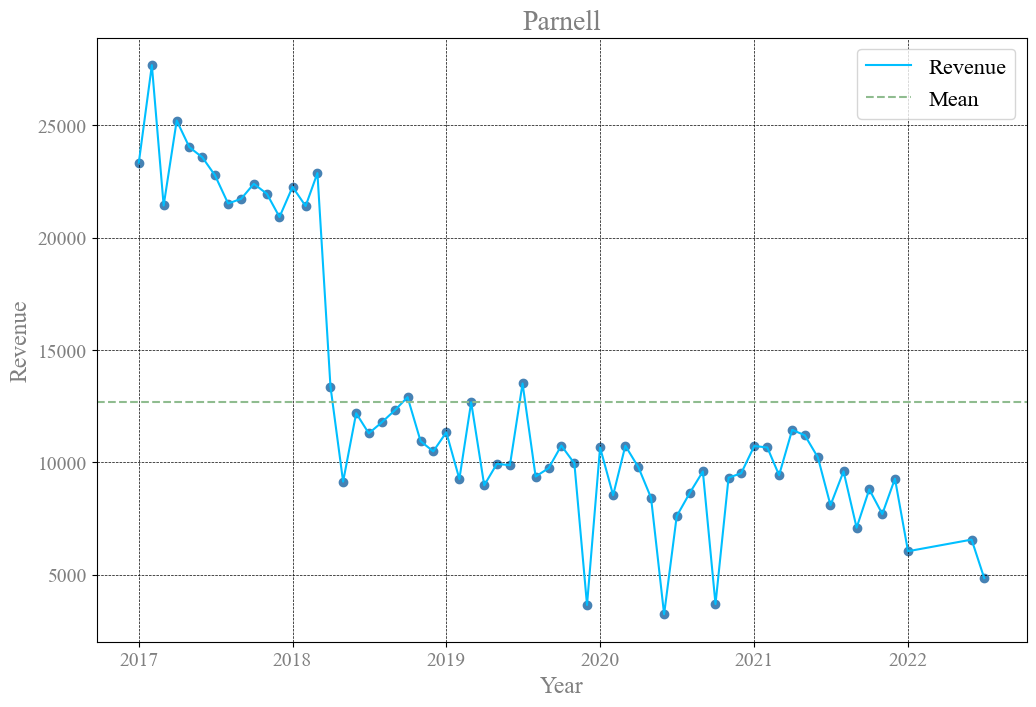

In [59]:
getMfgSalesTrend(mfgs[15])

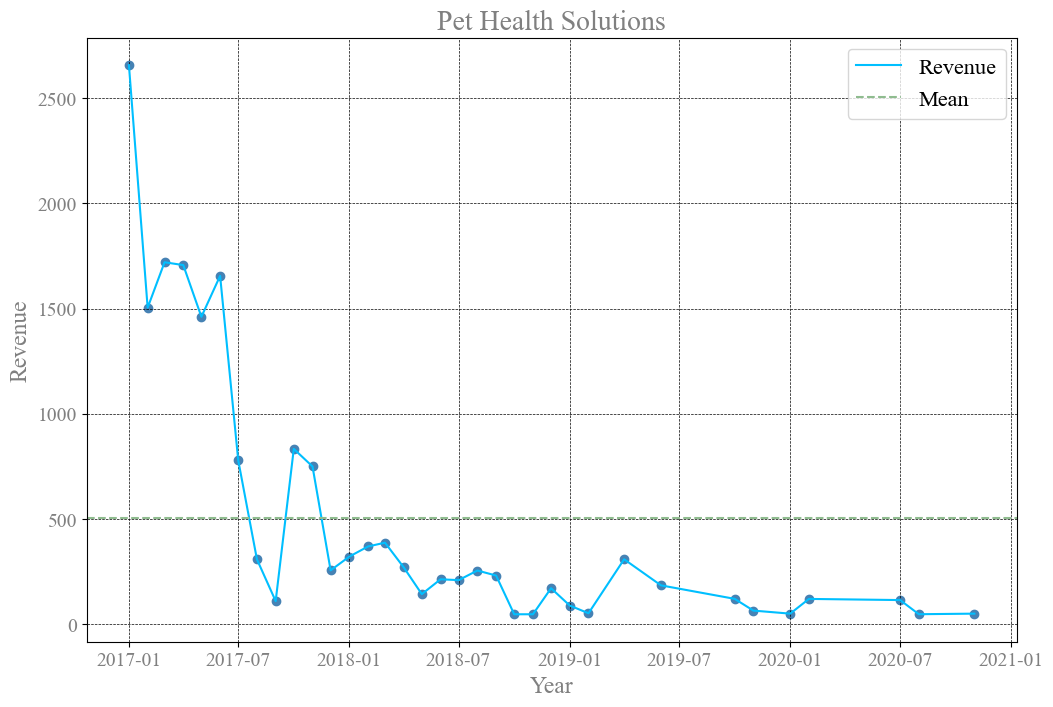

In [60]:
getMfgSalesTrend(mfgs[16])

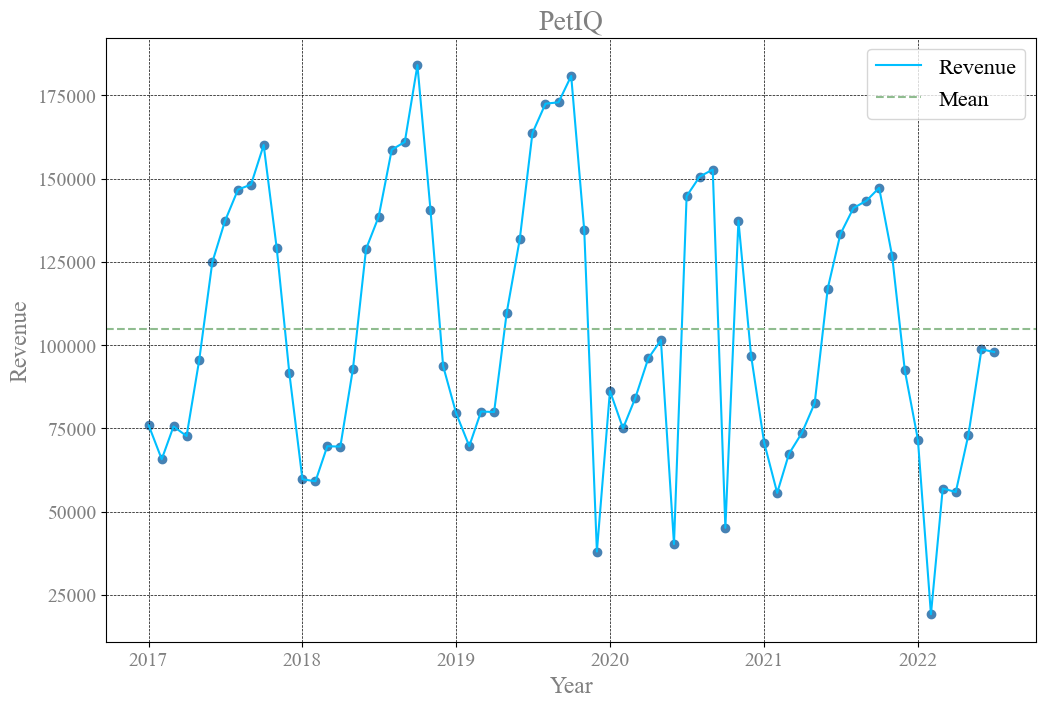

In [61]:
getMfgSalesTrend(mfgs[17])
plt.savefig('PetIQ.png')

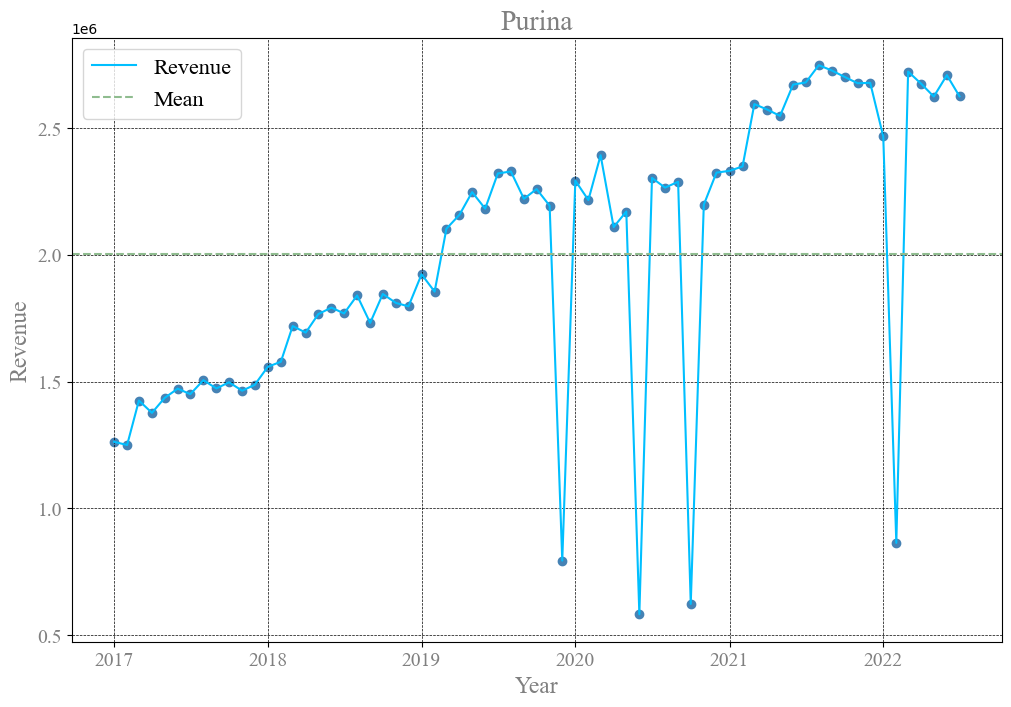

In [62]:
getMfgSalesTrend(mfgs[18])

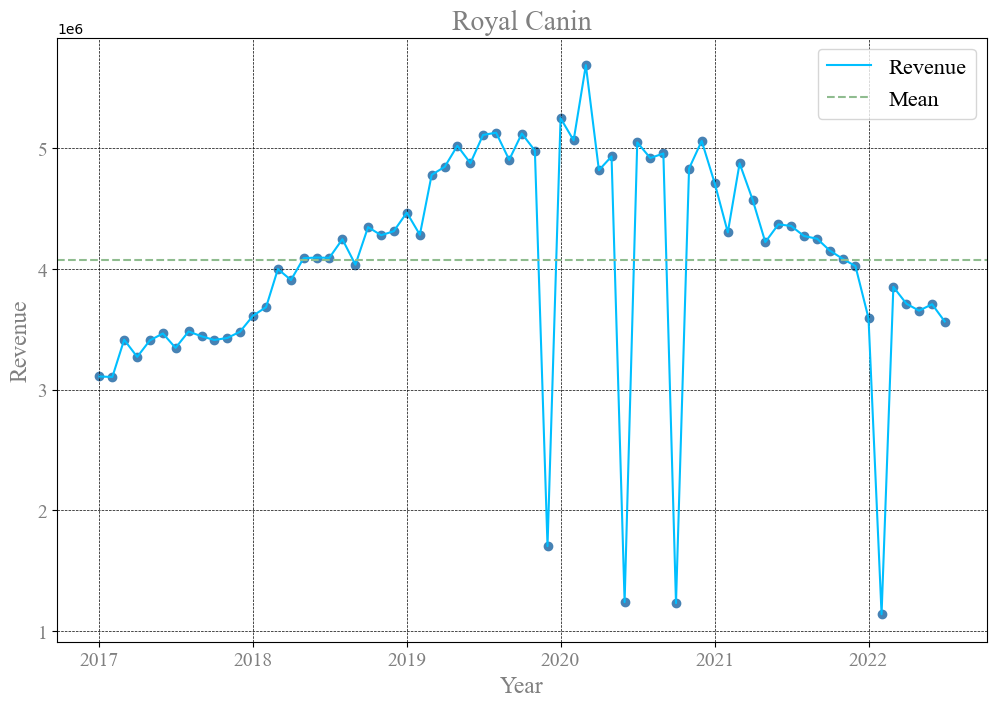

In [63]:
getMfgSalesTrend(mfgs[19])

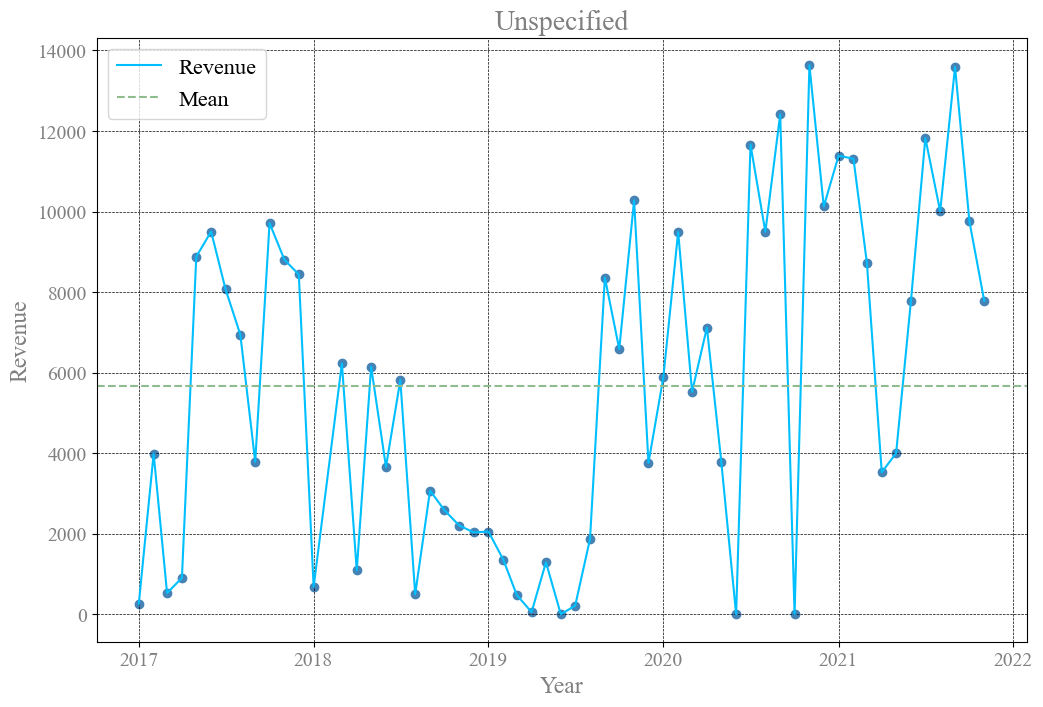

In [64]:
getMfgSalesTrend(mfgs[20])

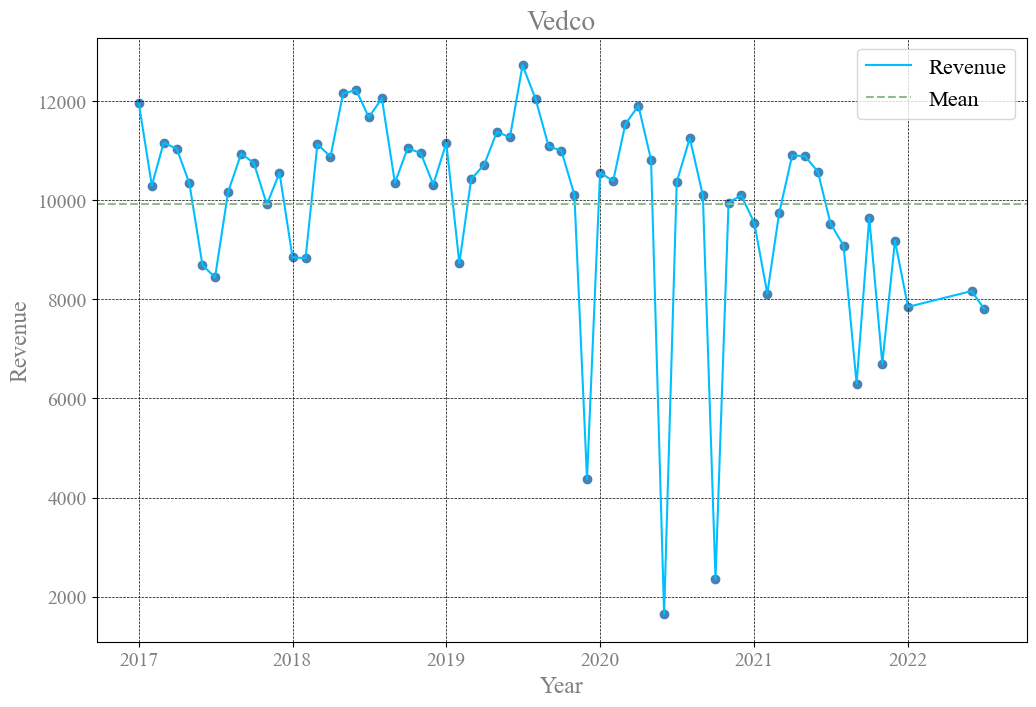

In [65]:
getMfgSalesTrend(mfgs[21])

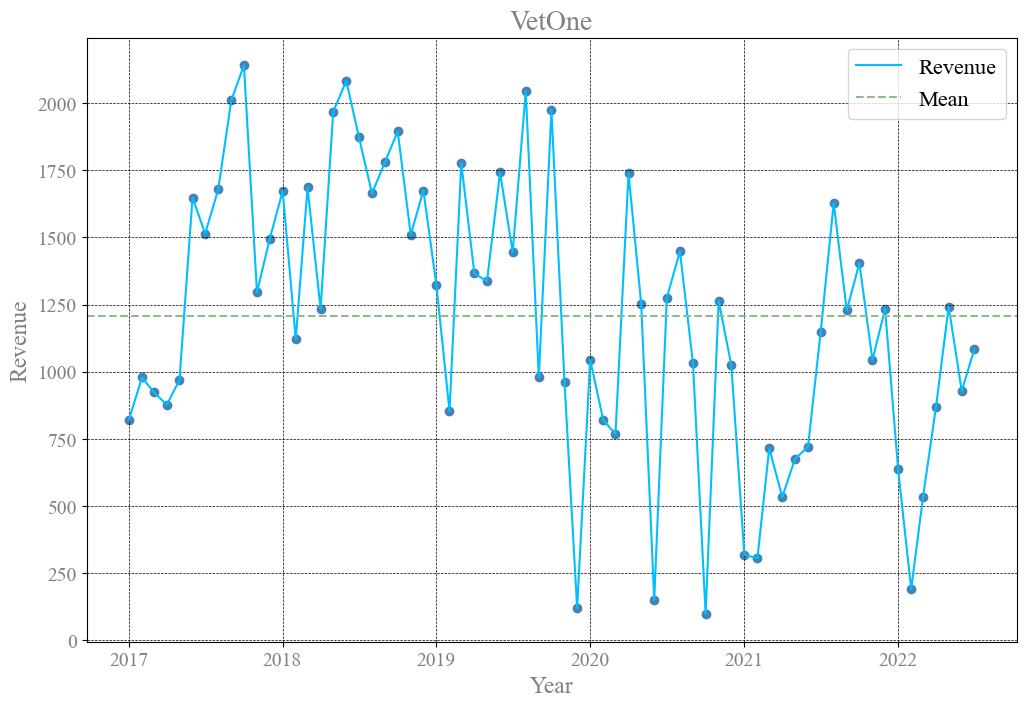

In [66]:
getMfgSalesTrend(mfgs[22])

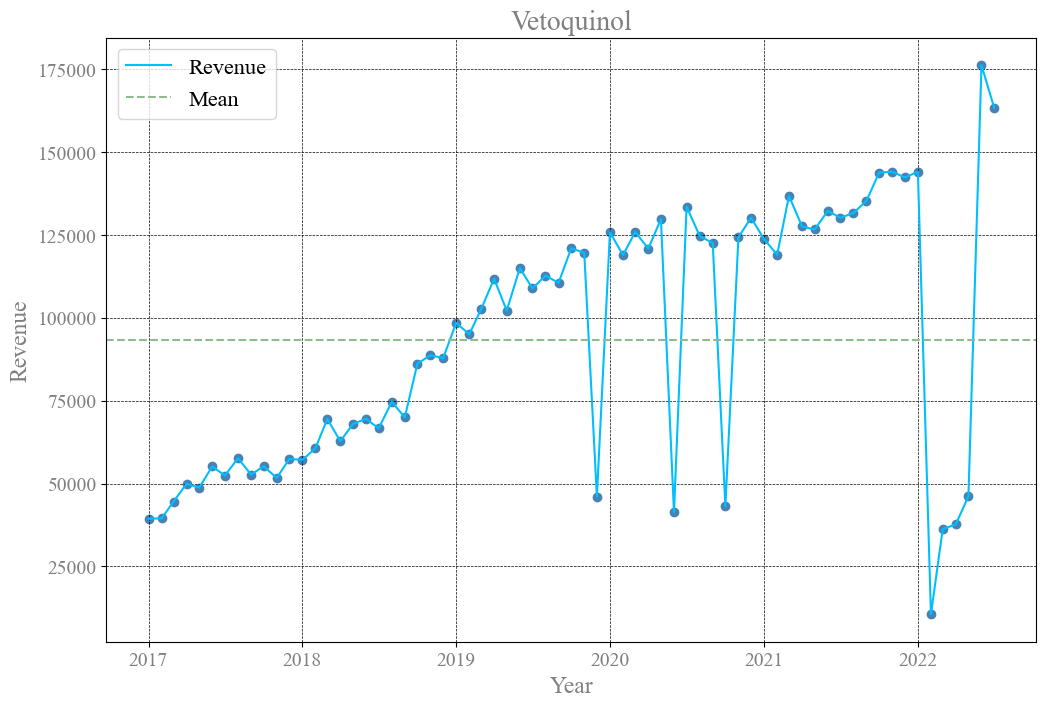

In [67]:
getMfgSalesTrend(mfgs[23])

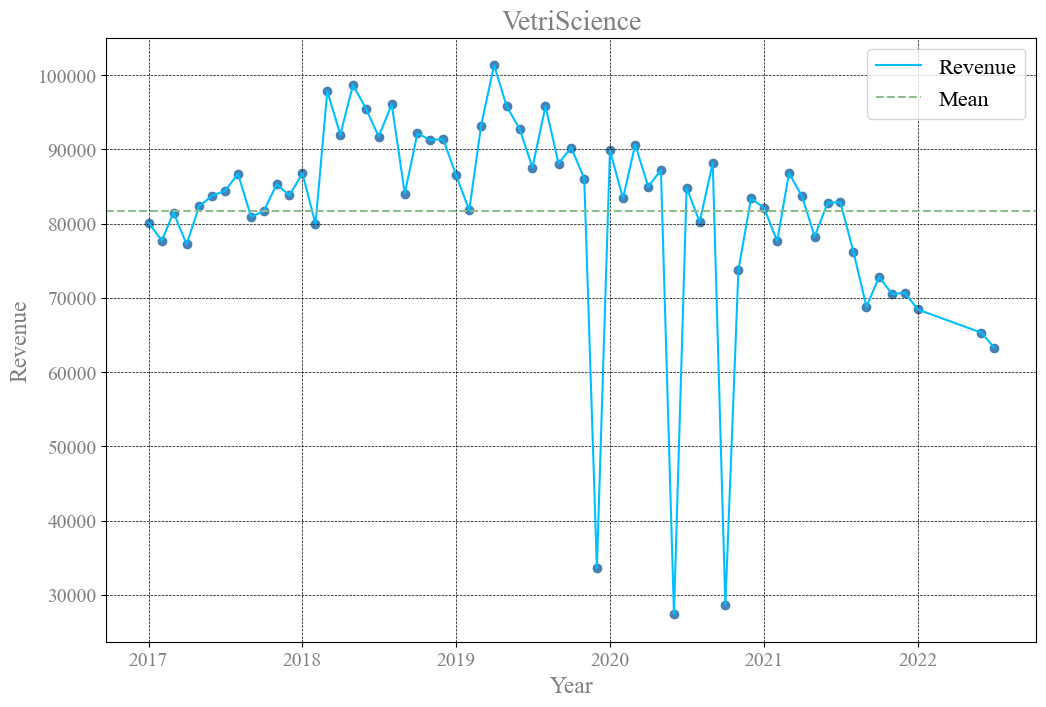

In [68]:
getMfgSalesTrend(mfgs[24])

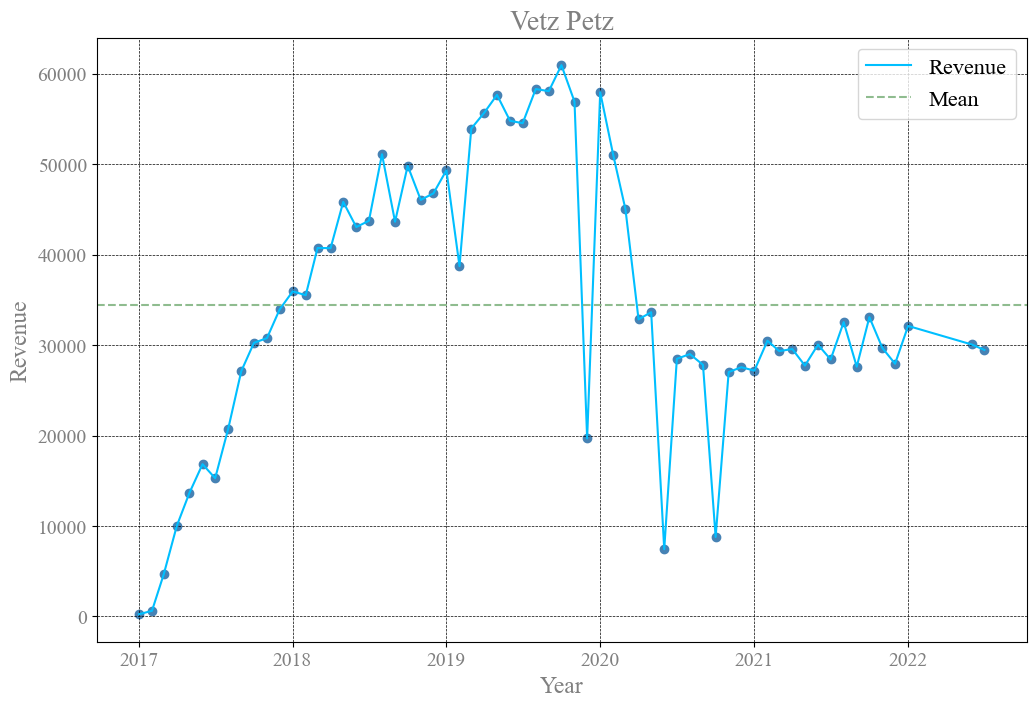

In [69]:
getMfgSalesTrend(mfgs[25])

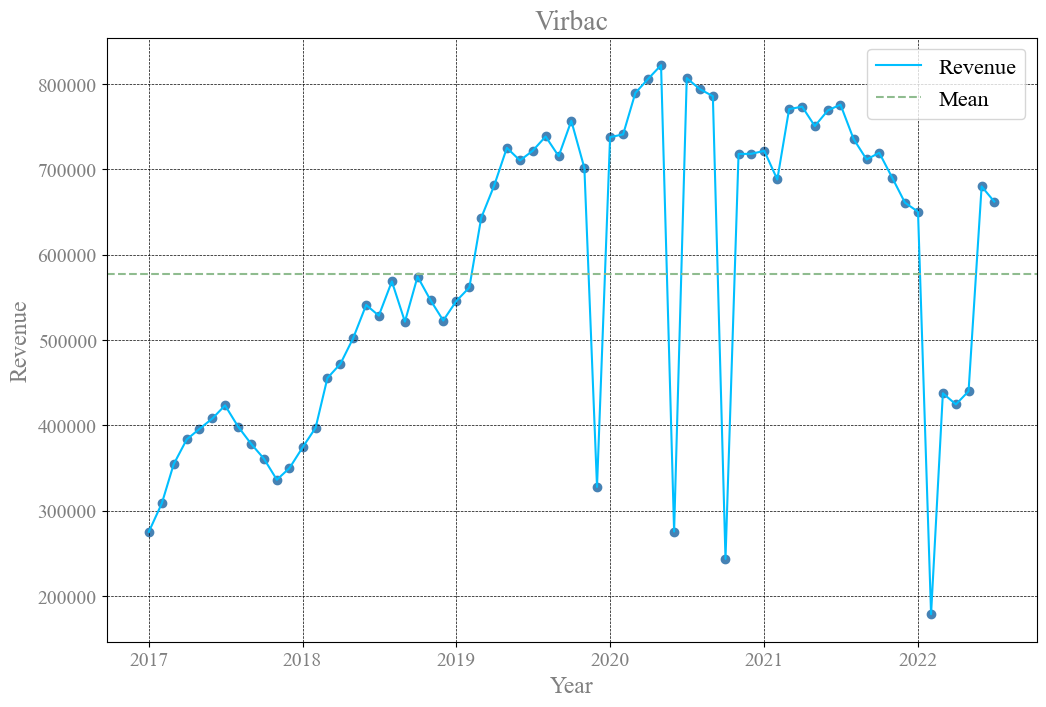

In [70]:
getMfgSalesTrend(mfgs[26])

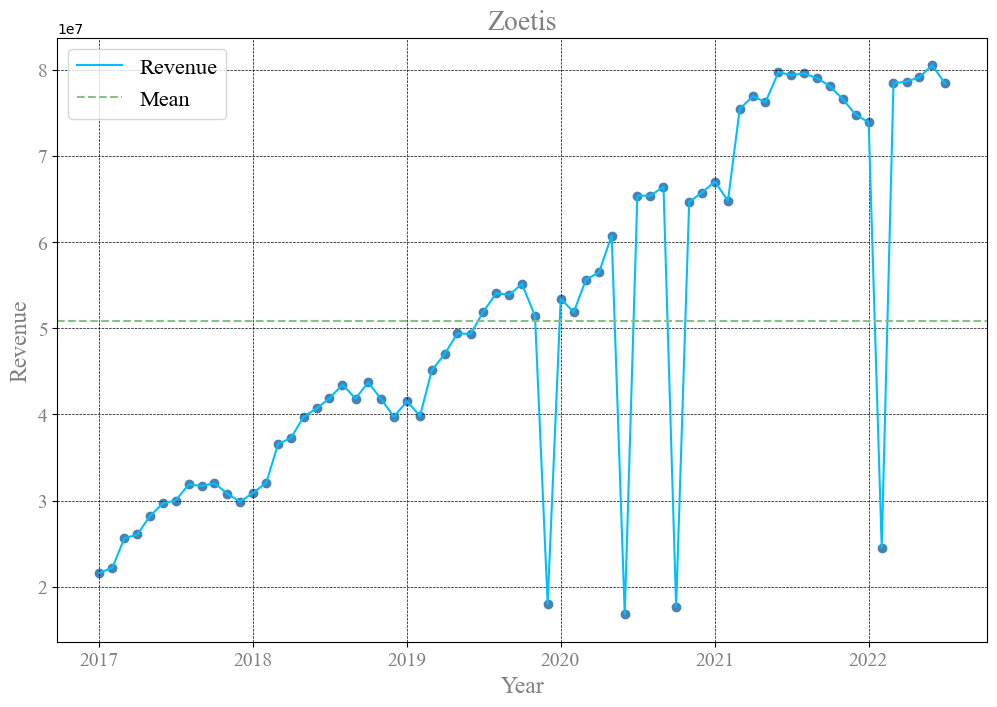

In [71]:
getMfgSalesTrend(mfgs[27])
plt.savefig('Zoetis.png')

In [74]:
detail = without_outlier.groupby(['icms_rep_mfg', 'icms_form'])['revenue'].sum()
detail

icms_rep_mfg     icms_form  
American Regent  Injection      5.145487e+07
BI               Chewable       2.668360e+09
                 Injection      1.810378e+07
                 Oral Liquid    6.173993e+07
                 Pill           5.578341e+07
                                    ...     
Zoetis           Chewable       5.282825e+08
                 Injection      1.169008e+09
                 Oral Liquid    3.787940e+07
                 Pill           1.618821e+09
                 Topical        5.303400e+07
Name: revenue, Length: 81, dtype: float64